In [97]:
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
# clustering
from sklearn.cluster import KMeans

In [98]:
df=pd.read_csv("C:/Users/athul/Downloads/Customer Churn.csv")

In [99]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [100]:
df.shape

(3150, 16)

In [101]:
df.info

<bound method DataFrame.info of       Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71     

In [102]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

In [103]:
df=df.drop(['Subscription  Length','Frequency of use','Frequency of SMS','Seconds of Use','Distinct Called Numbers','Age Group','Age'],axis=1)

In [104]:
df.head()

,Call Failure,Complains,Charge Amount,Tariff Plan,Status,Customer Value,FN,FP,Churn
0,8,0,0,1,1,197.640,177.8760,69.7640,0
1,0,0,0,1,2,46.035,41.4315,60.0000,0
2,10,0,0,1,1,1536.520,1382.8680,203.6520,0
3,10,0,0,1,1,240.020,216.0180,74.0020,0
4,3,0,0,1,1,145.805,131.2245,64.5805,0


In [105]:
sc=StandardScaler()

In [108]:
df['Customer Value']=sc.fit_transform(df['Customer Value'].values.reshape(-1,1))
df['FN']=sc.fit_transform(df['FN'].values.reshape(-1,1))
df['FP']=sc.fit_transform(df['FP'].values.reshape(-1,1))

In [109]:
df.head()

,Call Failure,Complains,Charge Amount,Tariff Plan,Status,Customer Value,FN,FP,Churn
0,8,0,0,1,1,-0.215355,-0.215355,-0.322907,0
1,0,0,0,1,2,-1.346381,-1.346381,-1.179830,0
2,10,0,0,1,1,1.549997,1.549997,1.636767,0
3,10,0,0,1,1,0.041128,0.041128,-0.038192,0
4,3,0,0,1,1,-0.635736,-0.635736,-0.789562,0


In [110]:
X = df.drop('Churn',axis=1)

In [111]:
X

,Call Failure,Complains,Charge Amount,Tariff Plan,Status,Customer Value,FN,FP
0,8,0,0,1,1,-0.215355,-0.215355,-0.322907
1,0,0,0,1,2,-1.346381,-1.346381,-1.179830
2,10,0,0,1,1,1.549997,1.549997,1.636767
3,10,0,0,1,1,0.041128,0.041128,-0.038192
4,3,0,0,1,1,-0.635736,-0.635736,-0.789562
...,...,...,...,...,...,...,...,...
3145,21,0,2,2,1,0.770540,0.770540,0.771511
3146,17,0,1,1,1,0.163739,0.163739,0.097916
3147,13,0,4,1,1,0.250068,0.250068,0.193747
3148,7,0,2,1,1,1.304775,1.304775,1.364552


In [112]:
Y = df.Churn

In [113]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3145    0
3146    0
3147    0
3148    0
3149    1
Name: Churn, Length: 3150, dtype: int64

In [114]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athul\anaconda3\Lib\site-packages\sklearn\clust

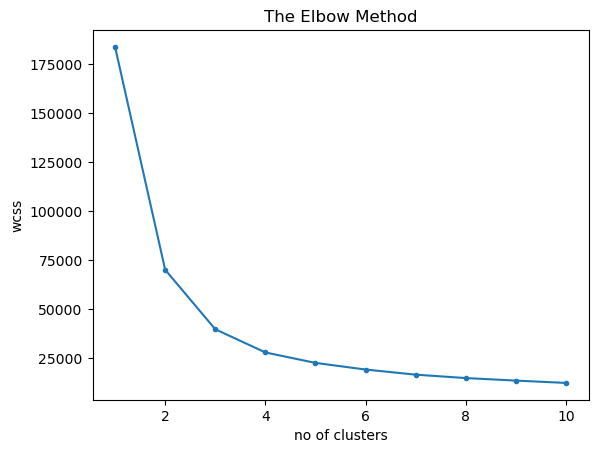

In [115]:
plt.plot(range(1,11), wcss,marker=".")
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [116]:
km=KMeans(n_clusters=3,random_state=43)

In [117]:
df['Cluster']=km.fit_predict(df)

C:\Users\athul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [118]:
df.head()

,Call Failure,Complains,Charge Amount,Tariff Plan,Status,Customer Value,FN,FP,Churn,Cluster
0,8,0,0,1,1,-0.215355,-0.215355,-0.322907,0,1
1,0,0,0,1,2,-1.346381,-1.346381,-1.179830,0,0
2,10,0,0,1,1,1.549997,1.549997,1.636767,0,1
3,10,0,0,1,1,0.041128,0.041128,-0.038192,0,1
4,3,0,0,1,1,-0.635736,-0.635736,-0.789562,0,0


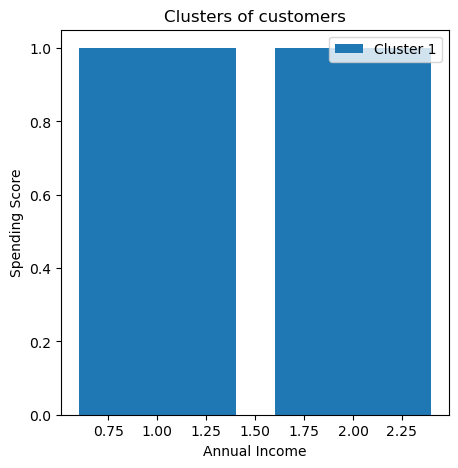

In [119]:
plt.figure(figsize=(5,5))
plt.bar(df['Tariff Plan'],df['Churn'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of customers')
plt.legend(myLabels)
plt.show()

In [120]:
plt.figure(figsize=(5,5))
myLabels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
plt.scatter(df['Status'],df['FP'],c=df['Cluster'],cmap='viridis',s=100,alpha=0.8,edgecolors='k')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of customers')
plt.legend(myLabels)
plt.show()

In [121]:
df['FP'].value_counts()

FP
-1.179830    687
-0.981224      4
-0.470126      4
 1.638156      4
-0.895115      4
            ... 
-1.000668      1
 0.317355      1
 0.052084      1
 0.768733      1
-1.035389      1
Name: count, Length: 2195, dtype: int64